<a href="https://colab.research.google.com/github/Fabmarucci/1aula_machine_learning/blob/main/ProjetoM_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


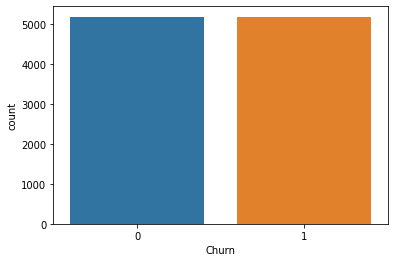

In [1]:
import pandas as pd

dados = pd.read_csv('/content/Customer_Churn.csv')

dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']]
traducao_dic = {'Sim' : 1, 'Nao': 0}
dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']]

dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)

dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

dados_final.head()

pd.set_option('display.max_columns', 39)

dados_final.head()

Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1]]

import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

!pip install -U imbalanced-learn

# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.
